# Pacmann 1st Project: Probability I

##### Created and Aranged by Rahman Aziz Firmansyah

## Descriptive Statistics Analyses

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# average insurance users
avg_age_users = np.mean(insurance['age'])
print(f"Average insurance users' age: {avg_age_users:.0f}")

Average insurance users' age: 39


Insight #1: Average insurance users' age is 39

In [4]:
# conditional statement for smoker
smoker = insurance['smoker'] == 'yes'

# average body mass index of insurance users that smoke
avg_bmi_smokers = np.mean(insurance['bmi'][smoker])
avg_bmi_nonsmokers = np.mean(insurance['bmi'][~smoker])
print(f"Average BMI of users that smoke: {avg_bmi_smokers:.2f}")
print(f"Average BMI of users that do not smoke: {avg_bmi_nonsmokers:.2f}")

Average BMI of users that smoke: 30.71
Average BMI of users that do not smoke: 30.65


Insight #2: Average BMI of users **both** smoker and non-smoker are **relatively the same**

In [5]:
# average charges of smokers
avg_charges_smokers = np.mean(insurance['charges'][smoker])

# average charges of non smokers
avg_charges_nonsmokers = np.mean(insurance['charges'][~smoker])

print(f"Average charges of smoker users: {avg_charges_smokers:.2f}")
print(f"Average charges of non-smoker users: {avg_charges_nonsmokers:.2f}")

Average charges of smoker users: 32050.23
Average charges of non-smoker users: 8434.27


Insight #3: Difference between average charge of insurance users that smoke and do not smoke is signifficant

In [6]:
# average BMI of users aged over 25 that smoke and don't smoke

# conditional stament for users who is aged over 25


over_25 = insurance['age'] > 25

# average BMI of users aged over 25 that smoke
avg_bmi_25_smokers = np.mean(insurance['bmi'][smoker & over_25])

# average BMI of users aged over 25 that don't smoke
avg_bmi_25_nonsmokers = np.mean(insurance['bmi'][~smoker & over_25])

print(f"Average BMI of users over 25 and smoke: {avg_bmi_25_smokers:.2f}")
print(f"Average BMI of users over 25 and do not smoke: {avg_bmi_25_nonsmokers:.2f}")

Average BMI of users over 25 and smoke: 30.58
Average BMI of users over 25 and do not smoke: 30.93


Insight #4: Average BMI of users either smokers or non smokers, and either belong to older or younger age, relatively the same

In [7]:
# comparing BMI between male and female users

# conditional statement for male users
male = insurance['sex'] == 'male'

# average BMI of male users
avg_bmi_male = np.mean(insurance['bmi'][male])
avg_bmi_female = np.mean(insurance['bmi'][~male])

print(f"Average BMI of male users: {avg_bmi_male:.2f}")
print(f"Average BMI of female users: {avg_bmi_female:.2f}")

Average BMI of male users: 30.94
Average BMI of female users: 30.38


Insight #5: average BMI of users is **relatively same** **regradless** other factors such as smoker or non smokers, older or younger, male or female

## Categorical Variable Analyses

In [8]:
# which gender is charged the highest

# highest charges of male and female users
max_male_charge = np.max(insurance['charges'][male])
max_female_charge = np.max(insurance['charges'][~male])

print(f"Highest charge applied to male users: {max_male_charge}")
print(f"Highest charge applied to female users: {max_female_charge}")

Highest charge applied to male users: 62592.87309
Highest charge applied to female users: 63770.42801


Insight 1#: Highest charge belongs to a female user

In [9]:
# proportion of smokers and non smokers
p_smokers = len(insurance[smoker]) * 100/len(insurance)
p_nonsmokers = len(insurance[~smoker]) * 100/len(insurance)

print(f"Percentage of users that smoke to the total: {p_smokers:.2f}%")
print(f"Percentage of users that do not smoke to the total: {p_nonsmokers:.2f}%")

Percentage of users that smoke to the total: 20.48%
Percentage of users that do not smoke to the total: 79.52%


Insight #2: **More** insurance users are non-smokers than smokers

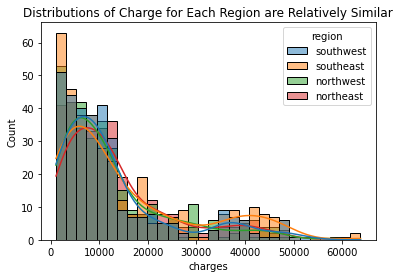

In [10]:
# distribution of charge for each region

sns.histplot(data=insurance, x='charges', hue='region', kde=True)
plt.title('Distributions of Charge for Each Region are Relatively Similar')
plt.show()

Insight #3: Probability of charges for each region are **relatively similar** therefore it **can be assumed** that **region is not a determining factor** of insurance charged to the users

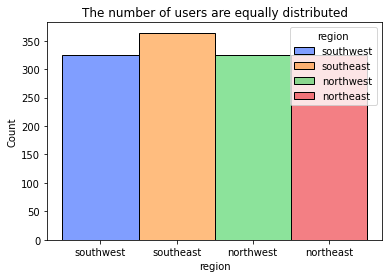

In [11]:
# is the number of users are equally distributed for each region?

sns.histplot(data=insurance, x='region', hue='region', palette='bright')
plt.title('The number of users are equally distributed')
plt.show()

Insight #4: The number of users are equally distributed with difference in southeast region

In [12]:
# probability of being a male or female given a smoker

n_smokers = len(insurance[smoker])

# probability of being a male given a smoker
p_male_smoker = len(insurance[smoker & male])/len(insurance[smoker])

# probability of being a female given a smoker
p_female_smoker = len(insurance[smoker & ~male])/len(insurance[smoker])

print(f"Peluang seorang user laki-laki jika diketahui dia seorang perokok: {p_male_smoker:.2f}")
print(f"Peluang seorang user perempuan jika diketahui dia seorang perokok: {p_female_smoker:.2f}")

Peluang seorang user laki-laki jika diketahui dia seorang perokok: 0.58
Peluang seorang user perempuan jika diketahui dia seorang perokok: 0.42


Insight #5: A user that smoke is **more likely** to be a male

## Continuous Variable Analysis

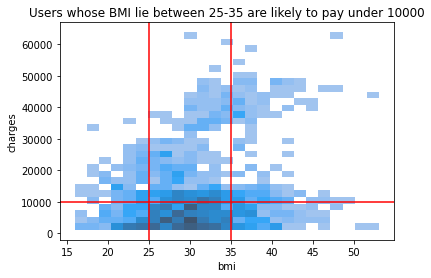

In [13]:
# probability amount of charge regarding to BMI

sns.histplot(data=insurance, x='bmi', y='charges')
plt.title('Users whose BMI lie between 25-35 are likely to pay under 10000')
plt.axhline(y=10000, color='red')
plt.axvline(x=25, color='red')
plt.axvline(x=35, color='red')
plt.show()

Insight #1: Roughly estimated, users whose BMI lie between 25-35 are likely to pay under 10000 of insurance charge

In [14]:
# how likely a smoker whose BMI is over 25 being charged more than 16700

# conditional statements
bmi_over_25 = insurance['bmi'] > 25
charged_167k = insurance['charges'] > 16700

This case can be solved with conditional probability model as follows:
$$
P(X > 16700 | Y > 25  \cap  Z = 1) = \frac{P(X > 16700  \cap  (Y > 25  \cap  Z = 1))}{P(Y > 25  \cap  Z = 1)}
$$

Let be random variables X = Charge, Y = BMI, Z = Smoker (which take two states, 1 (yes) or 0 (no))

In [15]:
n_Y_Z = len(insurance[bmi_over_25 & smoker])
n_X_Y_Z = len(insurance[charged_167k & bmi_over_25 & smoker])

# calculating probability of event
p_X_given_Y_Z = n_X_Y_Z/n_Y_Z

print(f"Probability of a smoker whose BMI is over 25 being charged more than 16.7k: {p_X_given_Y_Z:.2f}")

Probability of a smoker whose BMI is over 25 being charged more than 16.7k: 0.98


Insight #2: A smoker whose BMI is over 25 is **very likely** to be charged over 167k. It can be assumed that smoker and high bmi is two determining factor can be used for predicting insurance charges.

In [16]:
# what is the probability of a user being charged over 16.7k given a smoker
n_Z = len(insurance[smoker])
n_X_Z = len(insurance[charged_167k & smoker])

The problem above can be arranged into the following probabilistic model
$$
P(X > 16700 | Z = 1) = \frac{P(X > 16700 \cap Z = 1)}{P(Z = 1)}
$$

In [17]:
p_X_given_Z = n_X_Z/n_Z

print(f"Probability of random user being charged over 16.7k given a smoker: {p_X_given_Z:.2f}")

Probability of random user being charged over 16.7k given a smoker: 0.93


Insight #3: A user that smoke is very likely to be charged over 16.7k

In [18]:
# what is the probability of a user whose BMI is over 25 being charged over 16.7k
n_Y = len(insurance[bmi_over_25])
n_X_Y = len(insurance[bmi_over_25 & charged_167k])

the probability of a user whose BMI is over 25 being charged over 16.7k
$$
P(X > 16700 | Z = 25) = \frac{P(X > 16700 \cap Y > 25)}{P(Y > 25)}
$$

In [19]:
p_X_given_Y = n_X_Y/n_Y

print(f"Probability of a user whose BMI is greater than 25 being charged over 16.7k: {p_X_given_Y:.2f}")

Probability of a user whose BMI is greater than 25 being charged over 16.7k: 0.26


In [20]:
# what is the probability of a user being charged over 16.7k given not a smoker with BMI over 25
n_X_Y_Z0 = len(insurance[charged_167k & bmi_over_25 & ~smoker])
n_Y_Z0 = len(insurance[bmi_over_25 & ~smoker])

the probability of a user being charged over 16.7k given not a smoker with BMI over 25
$$
P(X > 16700 | Y > 25  \cap  Z = 0) = \frac{P(X > 16700  \cap  (Y > 25  \cap  Z = 0))}{P(Y > 25  \cap  Z = 0)}
$$

In [21]:
p_X_given_Y_Z0 = n_X_Y_Z0/n_Y_Z0

print(f"Probability of a user being charged over 16.7k given not a smoker with BMI over 25: {p_X_given_Y_Z0:.2f}")

Probability of a user being charged over 16.7k given not a smoker with BMI over 25: 0.08


Insight #3: Smoker **outweighs** BMI value as determining factor for probability of a user being charged over 16.7k

## Correlation Analyeses

In [22]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
# correlation between numerical features
insurance.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Correlation value indicates how linearly-correlated two variables are. As a correlation value of two variables **approaches 1**, it is said to be **positively correlated**. In other words, given a variable increases in value, another variable **follows along**. In opposite, if two variable has a correlation value that approaches -1, it is said to be **negatively correlated**. While a variable is moving towards positive direction, another is moving towards **opposite** direction. If the correlation value is 0, then it has no correlation.

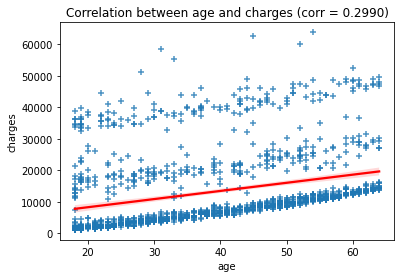

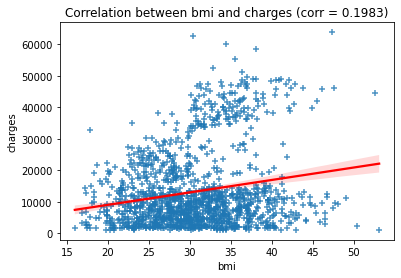

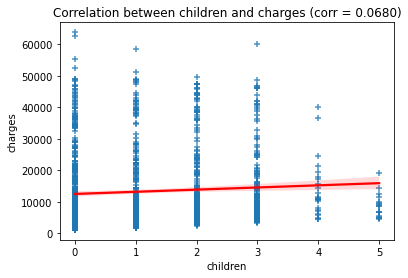

In [24]:
from statistics import correlation

for feature in insurance.select_dtypes('number').columns:
    if feature != 'charges':
        sns.regplot(data=insurance, x=feature, y='charges', line_kws={'color':'r'}, marker='+')
        plt.title(f"Correlation between {feature} and charges (corr = {correlation(insurance[feature], insurance['charges']):.4f})")
        plt.show()

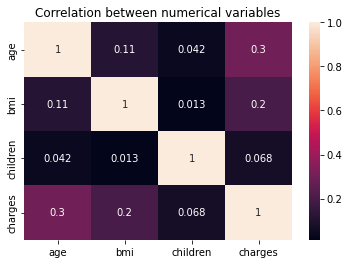

In [25]:
corr = insurance.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation between numerical variables')
plt.show()

Insight #1: The number of users' children **has no correlation** with the amount of charges applied

Insight #2: Age is the **most correlated** feature than any other features with BMI comes after it

Insight #3: As the age **increasing**, the amount of charge tends **rising up**

## Hypothesis Testing

Q1: Are the charges of smokers higher than that of nonsmokers?

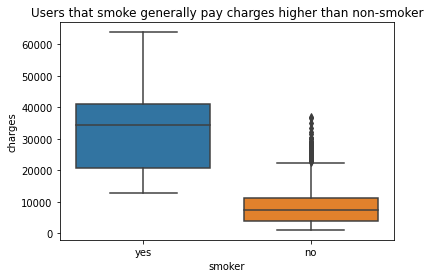

In [28]:
sns.boxplot(data=insurance, x='smoker', y='charges')
plt.title("Users that smoke generally pay charges higher than non-smoker")
plt.show()

Null hypothesis: Users that **smoke** pay **higher** than users do not smoke

We can assume that the data is normally distributed to perform T-test to investigate whether we remain with our current assumption or not

$$
H_0: \bar{x}_{smoker} \geq \bar{x}_{nonsmoker} \\
H_1: \bar{x}_{smoker} < \bar{x}_{nonsmoker}
$$

Since the variance between two categories are different, we use independent t-test for two samples.
$$
t = \frac{\bar{x}_{smoker}-\bar{x}_{nonsmoker}}{\sqrt{\frac{s_{smoker}}{n_{smoker}}+\frac{s_{nonsmoker}}{n_{nonsmoker}}}}
$$

In [33]:
# charges of users that smoke and not smoke
charges_smokers = insurance['charges'][smoker]
charges_nosmokers = insurance['charges'][~smoker]

In [31]:
from scipy.stats import ttest_ind
st, p_value = ttest_ind(a=charges_smokers, b=charges_nosmokers, equal_var=False, alternative='less')

In [32]:
print(f"Stat value: {st}")
print(f"p-value: {p_value}")

Stat value: 32.751887766341824
p-value: 1.0


Conclusion: Since p-value > $\alpha$, we failed to reject null hypothesis and we remain assume that **smoker** users **pay higher** than nonsmoker user

Q2: Are charges for those with BMI over 25 higher than that of under 25?

In [35]:
# preparing data
insurance_mod = insurance.copy()
insurance_mod['bmi_over_25'] = np.where(insurance['bmi'] > 25, 'yes', 'no')
insurance_mod.head()

,age,sex,bmi,children,smoker,region,charges,bmi_over_25
0,19,female,27.900,0,yes,southwest,16884.92400,yes
1,18,male,33.770,1,no,southeast,1725.55230,yes
2,28,male,33.000,3,no,southeast,4449.46200,yes
3,33,male,22.705,0,no,northwest,21984.47061,no
4,32,male,28.880,0,no,northwest,3866.85520,yes


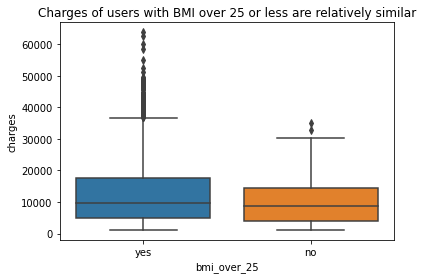

In [38]:
sns.boxplot(x='bmi_over_25', y='charges', data=insurance_mod)
plt.title('Charges of users with BMI over 25 or less are relatively similar')
plt.show()

In [39]:
# preparing data of charges
charge_over_25 = insurance_mod['charges'][insurance_mod['bmi_over_25'] == 'yes']
charge_less_25 = insurance_mod['charges'][insurance_mod['bmi_over_25'] == 'no']

In [41]:
print(f"Variance of charges applied to users with BMI over 25: {np.var(charge_over_25):.2f}")
print(f"Variance of charges applied to users with BMI less than 25: {np.var(charge_less_25):.2f}")

Variance of charges applied to users with BMI over 25: 164579189.52
Variance of charges applied to users with BMI less than 25: 55940041.24


Since the variances of two categories are different, we use independent t-test

$$
H_0: \bar{x}_{BMI > 25} = \bar{x}_{BMI \leq 25} \\
H_1: \bar{x}_{BMI > 25} \neq \bar{x}_{BMI \leq 25}
$$

In [46]:
st, p_val = ttest_ind(a=charge_over_25, b=charge_less_25, equal_var=False, alternative='greater')

In [47]:
print(f"Statistics value: {st}")
print(f"p-value: {p_val}")

Statistics value: 5.953486371741479
p-value: 2.198585436885263e-09


Conclusion: Since p-value < $\alpha$, null hypothesis is rejected and we assume that users with BMI over 25 **pay higher** than users with BMI less than 25

Q3: Are BMI of male and female users identical?

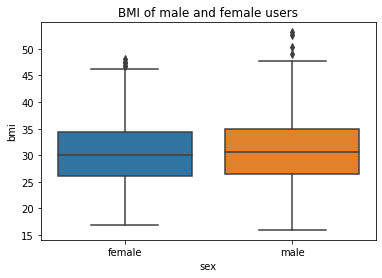

In [50]:
sns.boxplot(x = 'sex', y = 'bmi', data = insurance_mod)
plt.title("BMI of male and female users")
plt.show()

From the data visualized above we can assume that BMI of male and female users are identical. Hence, we can construct the following hypothesis.

$$
H_0: \bar{x}_{male} = \bar{x}_{female} \\
H_1: \bar{x}_{male} > \bar{x}_{female}
$$

In [51]:
bmi_male = insurance_mod['bmi'][male]
bmi_female = insurance_mod['bmi'][~male]

In [54]:
print(f"Variance of BMI of male users: {np.var(bmi_male):.2f}")
print(f"Variance of BMI of female users: {np.var(bmi_female):.2f}")

Variance of BMI of male users: 37.65
Variance of BMI of female users: 36.50


The variances of BMI between male and female users are slightly different, but let us assume those identical

In [59]:
st, p_val = ttest_ind(a=bmi_male, b=bmi_female, equal_var=True, alternative='greater')

In [60]:
print(f"Stats value: {st}")
print(f"p-value: {p_val}")

Stats value: 1.696752635752224
p-value: 0.04498818589492467


Since p-value < $\alpha$, null hypothesis is rejected and we conclude that male's BMI is **higher** than that of female.